<a href="https://colab.research.google.com/github/adityachoudharyclg/pytorchBasics/blob/master/CNN_using_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url

In [2]:
# Dowload the dataset
dataset_url = "http://files.fast.ai/data/cifar10.tgz"
download_url(dataset_url, '.')

In [0]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [4]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train', 'labels.txt']
['ship', 'deer', 'automobile', 'dog', 'airplane', 'horse', 'frog', 'truck', 'bird', 'cat']


In [5]:
# Data in airplane folder
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['39719_airplane.png', '49263_airplane.png', '10265_airplane.png', '16752_airplane.png', '4060_airplane.png']


Creating dataset

In [0]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [0]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

In [8]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.8588, 0.8588, 0.8627,  ..., 0.8510, 0.8471, 0.8392],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         [0.8667, 0.8667, 0.8745,  ..., 0.8588, 0.8549, 0.8471],
         ...,
         [0.8980, 0.9020, 0.9098,  ..., 0.8980, 0.8902, 0.8863],
         [0.8471, 0.8549, 0.8706,  ..., 0.8980, 0.8902, 0.8824],
         [0.7608, 0.7490, 0.7725,  ..., 0.8980, 0.8902, 0.8824]],

        [[0.9333, 0.9333, 0.9373,  ..., 0.9176, 0.9137, 0.9059],
         [0.9412, 0.9412, 0.9490,  ..., 0.9294, 0.9216, 0.9137],
         [0.9412, 0.9412, 0.9490,  ..., 0.9255, 0.9216, 0.9137],
         ...,
         [0.9608, 0.9569, 0.9569,  ..., 0.9412, 0.9412, 0.9412],
         [0.9020, 0.9098, 0.9255,  ..., 0.9412, 0.9412, 0.9373],
         [0.8157, 0.8039, 0.8275,  ..., 0.9412, 0.9412, 0.9373]],

        [[0.9608, 0.9608, 0.9647,  ..., 0.9490, 0.9412, 0.9412],
         [0.9686, 0.9686, 0.9765,  ..., 0.9608, 0.9529, 0.9490],
         [0.9686, 0.9686, 0.9765,  ..., 0.9569, 0.9529, 0.

In [9]:
# Gives which class represents which
print(dataset.class_to_idx)
# Total classes
print(dataset.classes)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [0]:
import matplotlib.pyplot as plt

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    print(img.permute(1, 2, 0).shape)
    plt.imshow(img.permute(1, 2, 0))

Label:  airplane (0)
torch.Size([32, 32, 3])


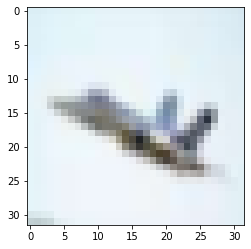

In [11]:
show_example(*dataset[0])

Training and validation datasets

In [0]:
from torch.utils.data import random_split

In [13]:
train_ds,val_ds=random_split(dataset,[int(len(dataset)*0.8),int(len(dataset)*0.2)])
print(len(train_ds))
print(len(val_ds))

40000
10000


In [0]:
from torch.utils.data import DataLoader

In [0]:
train_dl=DataLoader(train_ds,batch_size=256,shuffle=True)
val_dl=DataLoader(val_ds,batch_size=256,shuffle=True)

In [16]:
for xb,yb in train_dl:
    print(xb.shape)
    print(yb)
    break
for xb,yb in val_dl:
    print(xb.shape)
    print(yb)
    break

torch.Size([256, 3, 32, 32])
tensor([0, 0, 5, 6, 8, 3, 8, 9, 5, 2, 1, 1, 4, 4, 6, 7, 0, 2, 1, 6, 2, 9, 9, 9,
        0, 3, 5, 2, 1, 6, 3, 2, 1, 2, 3, 2, 7, 9, 8, 4, 8, 6, 4, 5, 5, 6, 0, 3,
        6, 8, 5, 0, 2, 9, 1, 8, 0, 0, 6, 5, 8, 6, 6, 5, 6, 4, 4, 1, 2, 6, 8, 3,
        9, 3, 7, 5, 6, 9, 4, 4, 0, 9, 2, 9, 8, 6, 8, 0, 6, 9, 9, 7, 3, 4, 8, 3,
        8, 1, 4, 6, 3, 5, 8, 0, 5, 6, 3, 0, 2, 0, 0, 5, 3, 6, 2, 5, 9, 2, 1, 2,
        8, 1, 1, 3, 6, 8, 0, 1, 3, 2, 2, 6, 0, 8, 9, 0, 8, 3, 1, 5, 8, 1, 4, 3,
        0, 1, 3, 8, 6, 8, 5, 8, 7, 7, 3, 5, 3, 1, 4, 7, 9, 1, 6, 9, 3, 3, 3, 9,
        7, 2, 5, 5, 5, 0, 4, 1, 9, 0, 2, 9, 1, 1, 1, 4, 7, 1, 7, 4, 7, 0, 6, 8,
        0, 9, 3, 9, 6, 5, 0, 8, 5, 8, 8, 8, 5, 8, 8, 8, 6, 6, 9, 1, 1, 0, 9, 3,
        3, 6, 0, 9, 8, 4, 6, 3, 7, 9, 6, 5, 7, 0, 9, 2, 7, 0, 2, 0, 5, 4, 1, 6,
        4, 1, 9, 9, 9, 7, 3, 3, 5, 7, 4, 1, 2, 3, 0, 2])
torch.Size([256, 3, 32, 32])
tensor([6, 8, 4, 3, 6, 3, 9, 9, 3, 9, 4, 4, 8, 5, 4, 3, 5, 6, 2, 3, 5, 5, 7, 7,
     

In [0]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, 10).permute(1, 2, 0))
        break

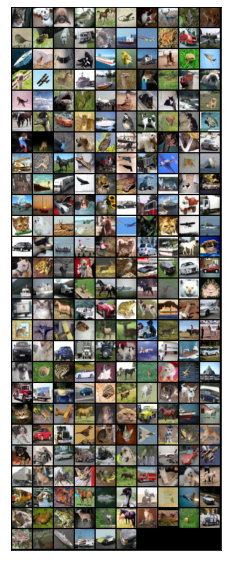

In [18]:
show_batch(train_dl)

Defining the model

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
simple_model=nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
    nn.MaxPool2d(2,2)
)

In [21]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([256, 3, 32, 32])
out.shape: torch.Size([256, 8, 16, 16])


In [0]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), # output: bs x 16 x 16 x 16
    
    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), # output: bs x 16 x 8 x 8

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), # output: bs x 16 x 4 x 4
    
    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), # output: bs x 16 x 2 x 2

    nn.Conv2d(16, 16, kernel_size=3, stride=1, padding=1),# keeps the size same
    nn.ReLU(),
    # MaxPool reduces total dimension by 4
    nn.MaxPool2d(2, 2), # output: bs x 16 x 1 x 1,
    
    nn.Flatten(), # output: bs x 16
    nn.Linear(16, 10) # output: bs x 10 
)

In [23]:
for images,labels in train_dl:
    print('images.shape:',images.shape)
    out=model(images)
    print('out.shape:',out.shape)
    break

images.shape: torch.Size([256, 3, 32, 32])
out.shape: torch.Size([256, 10])


For using GPU

In [0]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [25]:
device = get_default_device()
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(train_dl, device)
to_device(model, device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten()
  (16): Linear(in_features=16, out_features=10, bias=True)
)

In [0]:
def loss_batch(model, loss_func, xb, yb, opt=None, metric=None):
    # Generate predictions
    preds = model(xb)
    # Calculate loss
    loss = loss_func(preds, yb)
                     
    if opt is not None:
        # Compute gradients
        loss.backward()
        # Update parameters             
        opt.step()
        # Reset gradients
        opt.zero_grad()
    
    metric_result = None
    if metric is not None:
        # Compute the metric
        metric_result = metric(preds, yb)
    
    return loss.item(), len(xb), metric_result

In [0]:
def evaluate(model, loss_fn, valid_dl, metric=None):
    with torch.no_grad():
        # Pass each batch through the model
        results = [loss_batch(model, loss_fn, xb, yb, metric=metric)
                   for xb,yb in valid_dl]
        # Separate losses, counts and metrics
        losses, nums, metrics = zip(*results)
        # Total size of the dataset
        total = np.sum(nums)
        # Avg. loss across batches 
        avg_loss = np.sum(np.multiply(losses, nums)) / total
        avg_metric = None
        if metric is not None:
            # Avg. of metric across batches
            avg_metric = np.sum(np.multiply(metrics, nums)) / total
    return avg_loss, total, avg_metric

In [0]:
def fit(epochs, model, loss_fn, train_dl, valid_dl, 
        opt_fn=None, lr=None, metric=None):
    train_losses, val_losses, val_metrics = [], [], []
    
    # Instantiate the optimizer
    if opt_fn is None: opt_fn = torch.optim.SGD
    opt = opt_fn(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        # Training
        model.train()#new
        for xb,yb in train_dl:
            train_loss,_,_ = loss_batch(model, loss_fn, xb, yb, opt)

        # Evaluation
        model.eval()#new
        result = evaluate(model, loss_fn, valid_dl, metric)
        val_loss, total, val_metric = result
        
        # Record the loss & metric
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        val_metrics.append(val_metric)
        
        # Print progress
        if metric is None:
            print('Epoch [{}/{}], train_loss: {:4f}, val_loss: {:.4f}'
                  .format(epoch+1, epochs, train_loss, val_loss))
        else:
            print('Epoch [{}/{}], train_loss: {:.4f}, val_loss: {:.4f}, val_{}: {:.4f}'
                  .format(epoch+1, epochs, train_loss, val_loss, 
                          metric.__name__, val_metric))
    return train_losses, val_losses, val_metrics

In [0]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.sum(preds == labels).item() / len(preds)

In [0]:
import numpy as np

In [32]:
val_loss, _, val_acc = evaluate(model, F.cross_entropy, 
                                    valid_dl, metric=accuracy)
print('Loss: {:.4f}, Accuracy: {:.4f}'.format(val_loss, val_acc))

Loss: 2.3089, Accuracy: 0.1009


In [0]:
num_epochs = 10
opt_fn = torch.optim.Adam
lr = 0.005

In [34]:
history = fit(num_epochs, model, F.cross_entropy, 
              train_dl, valid_dl, opt_fn, lr, accuracy)
train_losses, val_losses, val_metrics = history

Epoch [1/10], train_loss: 1.7731, val_loss: 1.7256, val_accuracy: 0.3491
Epoch [2/10], train_loss: 1.8403, val_loss: 1.6601, val_accuracy: 0.3882
Epoch [3/10], train_loss: 1.2622, val_loss: 1.4921, val_accuracy: 0.4481
Epoch [4/10], train_loss: 1.3140, val_loss: 1.4593, val_accuracy: 0.4689
Epoch [5/10], train_loss: 1.3334, val_loss: 1.3933, val_accuracy: 0.4976
Epoch [6/10], train_loss: 1.3901, val_loss: 1.2795, val_accuracy: 0.5392
Epoch [7/10], train_loss: 1.2903, val_loss: 1.2573, val_accuracy: 0.5484
Epoch [8/10], train_loss: 1.2697, val_loss: 1.1651, val_accuracy: 0.5801
Epoch [9/10], train_loss: 1.3549, val_loss: 1.1909, val_accuracy: 0.5712
Epoch [10/10], train_loss: 1.2910, val_loss: 1.1398, val_accuracy: 0.5898
